In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_prv_df=pd.read_csv('health_care_claim/Train-1542865627584.csv')
train_prv_df.head(5)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [5]:
train_bene_df=pd.read_csv('health_care_claim/Train_Beneficiarydata-1542865627584.csv')
train_bene_df.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [6]:
train_in_df=pd.read_csv('health_care_claim/Train_Inpatientdata-1542865627584.csv')
train_in_df.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [7]:
train_out_df=pd.read_csv('health_care_claim/Train_Outpatientdata-1542865627584.csv')
train_out_df.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


## Provider Data-Set

In [8]:
train_prv_df['PotentialFraud']=train_prv_df.PotentialFraud.map({'Yes':1, 'No':0})

0    4904
1     506
Name: PotentialFraud, dtype: int64

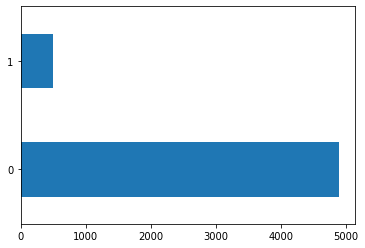

In [9]:
train_prv_df['PotentialFraud'].value_counts().plot(kind='barh')
train_prv_df['PotentialFraud'].value_counts()

## Beneficiary data 

In [10]:
train_bene_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
BeneID                             138556 non-null object
DOB                                138556 non-null object
DOD                                1421 non-null object
Gender                             138556 non-null int64
Race                               138556 non-null int64
RenalDiseaseIndicator              138556 non-null object
State                              138556 non-null int64
County                             138556 non-null int64
NoOfMonths_PartACov                138556 non-null int64
NoOfMonths_PartBCov                138556 non-null int64
ChronicCond_Alzheimer              138556 non-null int64
ChronicCond_Heartfailure           138556 non-null int64
ChronicCond_KidneyDisease          138556 non-null int64
ChronicCond_Cancer                 138556 non-null int64
ChronicCond_ObstrPulmonary         138556 non-null int64
ChronicCond_Depression          

In [11]:
train_bene_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [12]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

train_bene_df = train_bene_df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

In [13]:
train_bene_df['Gender'].value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

In [14]:
train_bene_df['Gender']=train_bene_df['Gender'].map({2:'M', 1:'F'})

In [15]:
# convert DOB and DOD to datetime object

train_bene_df['DOB'] = pd.to_datetime(train_bene_df['DOB'] , format = '%Y-%m-%d')
train_bene_df['DOD'] = pd.to_datetime(train_bene_df['DOD'],format = '%Y-%m-%d',errors='ignore')

#creating age column

train_bene_df['Age'] = round(((train_bene_df['DOD'] - train_bene_df['DOB']).dt.days)/365)

In [16]:
## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.

train_bene_df.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - train_bene_df['DOB']).dt.days)/365),
                                 inplace=True)

In [17]:
train_bene_df.head(1)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,F,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0


In [18]:
# creating IsDead feature

train_bene_df.loc[train_bene_df.DOD.isna(),'IsDead']=0
train_bene_df.loc[train_bene_df.DOD.notna(),'IsDead']=1
train_bene_df.loc[:,'IsDead'].head(7)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
Name: IsDead, dtype: float64

In [19]:
train_bene_df = train_bene_df.replace({'RenalDiseaseIndicator': 'Y'}, 1)
train_bene_df.RenalDiseaseIndicator.value_counts()

0    118978
1     19578
Name: RenalDiseaseIndicator, dtype: int64

In [20]:
train_bene_df.drop(labels=['DOB', 'DOD', 'Race', 'State', 'County'], axis=1, inplace=True)
train_bene_df.columns

Index(['BeneID', 'Gender', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'IsDead'],
      dtype='object')

In [21]:
train_bene_df.NoOfMonths_PartACov.value_counts()

12    137389
0       1000
6         38
11        28
8         26
10        18
7         16
4         13
5          8
9          7
3          5
2          5
1          3
Name: NoOfMonths_PartACov, dtype: int64

In [22]:
train_bene_df.loc[train_bene_df.NoOfMonths_PartACov==12,'Month_Covered_12']=1
train_bene_df.loc[train_bene_df.NoOfMonths_PartACov!=12,'Month_Covered_12']=0

In [23]:
train_bene_df.head(1)

,BeneID,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12
0,BENE11001,F,0,12,12,1,0,1,0,0,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0


In [24]:
train_bene_df.Month_Covered_12.value_counts()

1.0    137389
0.0      1167
Name: Month_Covered_12, dtype: int64

## In Patient

In [25]:
train_in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
BeneID                    40474 non-null object
ClaimID                   40474 non-null object
ClaimStartDt              40474 non-null object
ClaimEndDt                40474 non-null object
Provider                  40474 non-null object
InscClaimAmtReimbursed    40474 non-null int64
AttendingPhysician        40362 non-null object
OperatingPhysician        23830 non-null object
OtherPhysician            4690 non-null object
AdmissionDt               40474 non-null object
ClmAdmitDiagnosisCode     40474 non-null object
DeductibleAmtPaid         39575 non-null float64
DischargeDt               40474 non-null object
DiagnosisGroupCode        40474 non-null object
ClmDiagnosisCode_1        40474 non-null object
ClmDiagnosisCode_2        40248 non-null object
ClmDiagnosisCode_3        39798 non-null object
ClmDiagnosisCode_4        38940 non-null object
ClmDiagnosisCode_5        37

In [26]:
# As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

train_in_df['AdmissionDt'] = pd.to_datetime(train_in_df['AdmissionDt'] , format = '%Y-%m-%d')
train_in_df['DischargeDt'] = pd.to_datetime(train_in_df['DischargeDt'],format = '%Y-%m-%d')
train_in_df['AdmitForDays'] = ((train_in_df['DischargeDt'] - train_in_df['AdmissionDt']).dt.days)+1

In [27]:
print('Min AdmitForDays Train:- ',train_in_df.AdmitForDays.min())
print('Max AdmitForDays Train:- ',train_in_df.AdmitForDays.max())
train_in_df.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36


0

In [28]:
train_in_df.AdmitForDays.describe()

count    40474.000000
mean         6.665168
std          5.638538
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         36.000000
Name: AdmitForDays, dtype: float64

In [29]:
train_in_df['ClaimStartDt'] = pd.to_datetime(train_in_df['ClaimStartDt'] , format = '%Y-%m-%d')
train_in_df['ClaimEndDt'] = pd.to_datetime(train_in_df['ClaimEndDt'],format = '%Y-%m-%d')

In [30]:
train_in_df['ClaimTimeTaken'] = ((train_in_df['ClaimEndDt'] - train_in_df['ClaimStartDt']).dt.days)+1

In [31]:
print('Min ClaimTimeTaken Train:- ',train_in_df.ClaimTimeTaken.min())
print('Max ClaimTimeTaken Train:- ',train_in_df.ClaimTimeTaken.max())

Min ClaimTimeTaken Train:-  1
Max ClaimTimeTaken Train:-  37


In [32]:
train_in_df.ClaimTimeTaken.describe()

count    40474.000000
mean         6.660251
std          5.628873
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         37.000000
Name: ClaimTimeTaken, dtype: float64

In [33]:
train_in_df.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,ClaimTimeTaken
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,9,9
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,18,18


In [34]:
train_in_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'AdmitForDays', 'ClaimTimeTaken'],
      dtype='object')

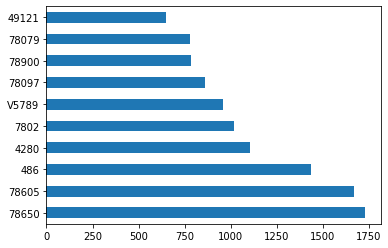

In [35]:
train_in_df.ClmAdmitDiagnosisCode.value_counts()[0:10].plot(kind='barh')

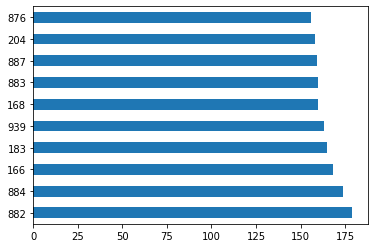

In [36]:
train_in_df.DiagnosisGroupCode.value_counts()[:10].plot(kind='barh')

In [37]:
train_in_df.ClmProcedureCode_1.value_counts()

9904.0    1137
8154.0    1021
66.0       893
3893.0     849
3995.0     805
          ... 
8018.0       1
302.0        1
9626.0       1
8013.0       1
1474.0       1
Name: ClmProcedureCode_1, Length: 1117, dtype: int64

In [38]:
train_in_df.drop(labels=['ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmProcedureCode_6'], axis=1, inplace=True)

In [39]:
train_in_df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,AdmitForDays,ClaimTimeTaken
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,40474.000000,40474.000000
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,6.665168,6.660251
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,5.638538,5.628873
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,1.000000,1.000000
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,3.000000,3.000000
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,5.000000,5.000000
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,8.000000,8.000000
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,36.000000,37.000000


In [40]:
train_in_df.head(5)

,BeneID,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,AdmitForDays,ClaimTimeTaken
0,BENE11001,PRV55912,26000,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,7,7
1,BENE11001,PRV55907,5000,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,3,3
2,BENE11001,PRV56046,5000,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
3,BENE11011,PRV52405,5000,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,9,9
4,BENE11014,PRV56614,10000,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,18,18


In [41]:
train_in_df.shape

(40474, 25)

In [42]:
train_bene_df.shape

(138556, 23)

In [43]:
train_bene_df.head(1)

,BeneID,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12
0,BENE11001,F,0,12,12,1,0,1,0,0,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0


### Joining train_in_df with train_bene_df

In [44]:
train_in_patient=pd.merge(train_in_df,train_bene_df,left_on='BeneID',right_on='BeneID',how='inner')

In [45]:
train_in_patient.head()

,BeneID,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12
0,BENE11001,PRV55912,26000,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0
1,BENE11001,PRV55907,5000,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0
2,BENE11001,PRV56046,5000,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0
3,BENE11011,PRV52405,5000,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,...,0,1,1,5000,1068,250,320,96.0,0.0,1.0
4,BENE11014,PRV56614,10000,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,...,0,0,0,21260,2136,120,100,72.0,0.0,1.0


In [46]:
train_in_patient.shape

(40474, 47)

In [47]:
train_in_patient.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'AdmitForDays', 'ClaimTimeTaken', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAn

In [48]:
train_prv_df.PotentialFraud.value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [49]:
train_in_patient=pd.merge(train_in_patient, train_prv_df, left_on='Provider', right_on='Provider', how='inner')

In [50]:
train_in_patient

,BeneID,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud
0,BENE11001,PRV55912,26000,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,...,1,1,36000,3204,60,70,67.0,0.0,1.0,1
1,BENE17521,PRV55912,19000,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,...,0,0,19000,1068,100,20,96.0,0.0,1.0,1
2,BENE21718,PRV55912,17000,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,...,0,0,17000,1068,1050,540,87.0,0.0,1.0,1
3,BENE22934,PRV55912,13000,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,...,1,0,27000,2136,450,160,79.0,0.0,1.0,1
4,BENE24402,PRV55912,3000,2009-01-08,1748,1068.0,2009-01-12,593,2330,NaN,...,0,0,3000,1068,8900,740,84.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE156181,PRV55706,12000,2009-06-24,78097,1068.0,2009-07-01,940,78079,45341,...,1,1,20000,2136,740,320,58.0,0.0,1.0,0
40470,BENE156872,PRV51572,5000,2009-09-06,486,1068.0,2009-09-13,190,486,7905,...,0,1,5000,1068,2670,360,67.0,0.0,1.0,0
40471,BENE157414,PRV55688,14000,2009-11-15,4280,1068.0,2009-11-23,308,42821,E9342,...,1,0,26790,2136,70,0,70.0,0.0,1.0,0
40472,BENE158281,PRV56485,10000,2009-01-23,7823,1068.0,2009-01-23,238,41071,78552,...,0,0,10300,1068,5390,1730,52.0,0.0,1.0,0


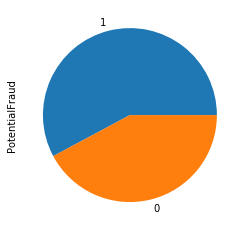

In [51]:
train_in_patient.PotentialFraud.value_counts().plot(kind='pie')

In [52]:
train_in_patient.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'AdmitForDays', 'ClaimTimeTaken', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAn

In [53]:
train_in_patient.drop(labels=['BeneID', 'Provider','AdmissionDt', 'DischargeDt'],inplace=True, axis=1)

In [54]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 44 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DeductibleAmtPaid                  39575 non-null float64
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
ClmDiagnosisCode_4                 38940 non-null object
ClmDiagnosisCode_5                 37580 non-null object
ClmDiagnosisCode_6                 35636 non-null object
ClmDiagnosisCode_7                 33216 non-null object
ClmDiagnosisCode_8                 30532 non-null object
ClmDiagnosisCode_9                 26977 non-null object
ClmDiagnosisCode_10                3927 non-null object
ClmProcedureCode_1                 23148 non-null float64
ClmProcedureCode_2                 5

In [55]:
train_in_patient.drop(labels=['ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5'],inplace=True, axis=1)

In [56]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 39 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DeductibleAmtPaid                  39575 non-null float64
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
ClmDiagnosisCode_4                 38940 non-null object
ClmDiagnosisCode_5                 37580 non-null object
ClmDiagnosisCode_6                 35636 non-null object
ClmDiagnosisCode_7                 33216 non-null object
ClmDiagnosisCode_8                 30532 non-null object
ClmDiagnosisCode_9                 26977 non-null object
ClmDiagnosisCode_10                3927 non-null object
AdmitForDays                       40474 non-null int64
ClaimTimeTaken                     404

In [57]:
train_in_patient.drop(labels=['ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',],inplace=True, axis=1)

In [58]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 32 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DeductibleAmtPaid                  39575 non-null float64
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
AdmitForDays                       40474 non-null int64
ClaimTimeTaken                     40474 non-null int64
Gender                             40474 non-null object
RenalDiseaseIndicator              40474 non-null object
NoOfMonths_PartACov                40474 non-null int64
NoOfMonths_PartBCov                40474 non-null int64
ChronicCond_Alzheimer              40474 non-null int64
ChronicCond_Heartfailure           40474 non-null int64
ChronicCond_KidneyDisease          40474 n

In [59]:
train_in_patient.InscClaimAmtReimbursed.describe()

count     40474.000000
mean      10087.884074
std       10303.099402
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [60]:
train_in_patient[train_in_patient['PotentialFraud']==1]['InscClaimAmtReimbursed'].describe()

count     23402.000000
mean      10310.593539
std       10671.735902
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [61]:
train_in_patient[train_in_patient['PotentialFraud']==0]['InscClaimAmtReimbursed'].describe()

count     17072.000000
mean       9782.597821
std        9767.276716
min           0.000000
25%        4000.000000
50%        7000.000000
75%       11000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [62]:
quant999=train_in_patient['InscClaimAmtReimbursed'].quantile(0.999)
quant001=train_in_patient['InscClaimAmtReimbursed'].quantile(0.001)
print(quant999, quant001)

90000.0 0.0


In [63]:
train_in_patient[train_in_patient['InscClaimAmtReimbursed']>quant999]['PotentialFraud'].value_counts()

1    27
0    13
Name: PotentialFraud, dtype: int64

In [64]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 32 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DeductibleAmtPaid                  39575 non-null float64
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
AdmitForDays                       40474 non-null int64
ClaimTimeTaken                     40474 non-null int64
Gender                             40474 non-null object
RenalDiseaseIndicator              40474 non-null object
NoOfMonths_PartACov                40474 non-null int64
NoOfMonths_PartBCov                40474 non-null int64
ChronicCond_Alzheimer              40474 non-null int64
ChronicCond_Heartfailure           40474 non-null int64
ChronicCond_KidneyDisease          40474 n

In [65]:
train_in_patient.DeductibleAmtPaid.value_counts()

1068.0    39575
Name: DeductibleAmtPaid, dtype: int64

In [66]:
train_in_patient.drop(['DeductibleAmtPaid'], axis=1,inplace=True)

In [67]:
train_in_patient.drop(['NoOfMonths_PartACov','NoOfMonths_PartBCov'], axis=1,inplace=True)

In [68]:
train_in_patient[train_in_patient['PotentialFraud']==0].describe()

,InscClaimAmtReimbursed,AdmitForDays,ClaimTimeTaken,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud
count,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,...,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.0
mean,9782.597821,6.559571,6.553831,0.506385,0.717256,0.600574,0.189843,0.476921,0.501640,0.802484,...,0.356842,0.167994,17131.792409,1872.230787,1833.889410,520.037605,74.063613,0.008318,0.992092,0.0
std,9767.276716,5.340645,5.329792,0.499974,0.450346,0.489795,0.392188,0.499482,0.500012,0.398137,...,0.479082,0.373872,17047.575718,1668.067004,3745.758245,934.647927,13.290553,0.090824,0.088575,0.0
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-50.000000,0.000000,26.000000,0.000000,0.000000,0.0
25%,4000.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,6000.000000,1068.000000,180.000000,40.000000,68.000000,0.000000,1.000000,0.0
50%,7000.000000,5.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,11600.000000,1068.000000,720.000000,210.000000,75.000000,0.000000,1.000000,0.0
75%,11000.000000,8.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,21807.500000,2136.000000,1972.500000,600.000000,83.000000,0.000000,1.000000,0.0
max,125000.000000,36.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,155600.000000,38272.000000,97510.000000,12090.000000,101.000000,1.000000,1.000000,0.0


In [72]:
train_in_patient[train_in_patient['PotentialFraud']==1].describe()

,InscClaimAmtReimbursed,AdmitForDays,ClaimTimeTaken,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud
count,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,...,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.0
mean,10310.593539,6.742202,6.737886,0.502350,0.725152,0.602641,0.191778,0.480771,0.502649,0.801726,...,0.362918,0.171182,17818.153149,1898.572002,1943.356551,536.090548,74.153363,0.007521,0.992565,1.0
std,10671.735902,5.845195,5.836285,0.500005,0.446447,0.489362,0.393708,0.499641,0.500004,0.398708,...,0.480852,0.376676,17923.052466,1700.368631,4090.862950,957.810205,13.104408,0.086397,0.085909,0.0
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-70.000000,0.000000,26.000000,0.000000,0.000000,1.0
25%,4000.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,6020.000000,1068.000000,190.000000,40.000000,68.000000,0.000000,1.000000,1.0
50%,7000.000000,5.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,12000.000000,1068.000000,750.000000,220.000000,75.000000,0.000000,1.000000,1.0
75%,12000.000000,8.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,22200.000000,2136.000000,2060.000000,620.000000,83.000000,0.000000,1.000000,1.0
max,125000.000000,36.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,161470.000000,38272.000000,102960.000000,13840.000000,101.000000,1.000000,1.000000,1.0


In [69]:
quant999=train_in_patient['IPAnnualReimbursementAmt'].quantile(0.999)
quant001=train_in_patient['IPAnnualReimbursementAmt'].quantile(0.001)
print(quant999, quant001)
train_in_patient[train_in_patient['IPAnnualReimbursementAmt']>quant999]['PotentialFraud'].value_counts()

136000.0 0.0


1    27
0    12
Name: PotentialFraud, dtype: int64

In [70]:
quant999=train_in_patient['IPAnnualDeductibleAmt'].quantile(0.999)
quant001=train_in_patient['IPAnnualDeductibleAmt'].quantile(0.001)
print(quant999, quant001)
train_in_patient[train_in_patient['IPAnnualDeductibleAmt']>quant999]['PotentialFraud'].value_counts()

22272.0 1068.0


1    22
0    18
Name: PotentialFraud, dtype: int64

In [71]:
quant999=train_in_patient['OPAnnualReimbursementAmt'].quantile(0.999)
quant001=train_in_patient['OPAnnualReimbursementAmt'].quantile(0.001)
print(quant999, quant001)
train_in_patient[train_in_patient['OPAnnualReimbursementAmt']>quant999]['PotentialFraud'].value_counts()

37339.31000000099 0.0


1    25
0    16
Name: PotentialFraud, dtype: int64

In [78]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 30 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
AdmitForDays                       40474 non-null int64
ClaimTimeTaken                     40474 non-null int64
Gender                             40474 non-null object
RenalDiseaseIndicator              40474 non-null object
ChronicCond_Alzheimer              40474 non-null int64
ChronicCond_Heartfailure           40474 non-null int64
ChronicCond_KidneyDisease          40474 non-null int64
ChronicCond_Cancer                 40474 non-null int64
ChronicCond_ObstrPulmonary         40474 non-null int64
ChronicCond_Depression             40474 non

In [74]:
train_in_patient['Gender_Male']=train_in_patient['Gender'].map({'M':1, 'F':0})

In [76]:
train_in_patient['RenalDiseaseIndicator'].value_counts()

0    29941
1    10533
Name: RenalDiseaseIndicator, dtype: int64

In [77]:
train_in_patient.columns

Index(['InscClaimAmtReimbursed', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'AdmitForDays', 'ClaimTimeTaken', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'IsDead', 'Month_Covered_12',
       'PotentialFraud', 'Gender_Male'],
      dtype='object')

In [127]:
X=train_in_patient[['InscClaimAmtReimbursed',
       'AdmitForDays', 'ClaimTimeTaken', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'IsDead', 'Month_Covered_12',
       'Gender_Male']]
y=train_in_patient[['PotentialFraud']]

print(X.shape,y.shape)

(40474, 23) (40474, 1)


In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 23 columns):
InscClaimAmtReimbursed             40474 non-null int64
AdmitForDays                       40474 non-null int64
ClaimTimeTaken                     40474 non-null int64
RenalDiseaseIndicator              40474 non-null object
ChronicCond_Alzheimer              40474 non-null int64
ChronicCond_Heartfailure           40474 non-null int64
ChronicCond_KidneyDisease          40474 non-null int64
ChronicCond_Cancer                 40474 non-null int64
ChronicCond_ObstrPulmonary         40474 non-null int64
ChronicCond_Depression             40474 non-null int64
ChronicCond_Diabetes               40474 non-null int64
ChronicCond_IschemicHeart          40474 non-null int64
ChronicCond_Osteoporasis           40474 non-null int64
ChronicCond_rheumatoidarthritis    40474 non-null int64
ChronicCond_stroke                 40474 non-null int64
IPAnnualReimbursementAmt           40474 non-null 

In [129]:
convert_dict = {'RenalDiseaseIndicator': int}
X = X.astype(convert_dict) 

## Training begins

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [130]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [136]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [137]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [133]:
accuracy_score(y_test, y_pred)

0.5796755332290209

In [138]:
f1_score(y_test, y_pred)

0.7339172140548431

In [139]:
confusion_matrix(y_test, y_pred)

array([[   0, 5104],
       [   0, 7039]])

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
accuracy_score(y_test, y_pred)

0.5252408795190645

In [142]:
confusion_matrix(y_test, y_pred)

array([[1878, 3226],
       [2539, 4500]])

In [147]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(knn).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.0069 ± 0.0078,x15
0.0044 ± 0.0036,x16
0.0003 ± 0.0002,x9
0.0003 ± 0.0029,x19
0.0001 ± 0.0001,x14
0.0001 ± 0.0003,x3
0.0000 ± 0.0001,x7
0 ± 0.0000,x20
0 ± 0.0000,x21
-0.0000 ± 0.0004,x11


In [157]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(knn).fit(X_train, y_train)
eli5.show_weights(perm)

Weight,Feature
0.1729 ± 0.0028,x15
0.1556 ± 0.0040,x0
0.1320 ± 0.0019,x17
0.0759 ± 0.0043,x18
0.0628 ± 0.0035,x16
0.0071 ± 0.0016,x19
0.0023 ± 0.0007,x2
0.0019 ± 0.0009,x1
0.0004 ± 0.0002,x9
0.0002 ± 0.0002,x22


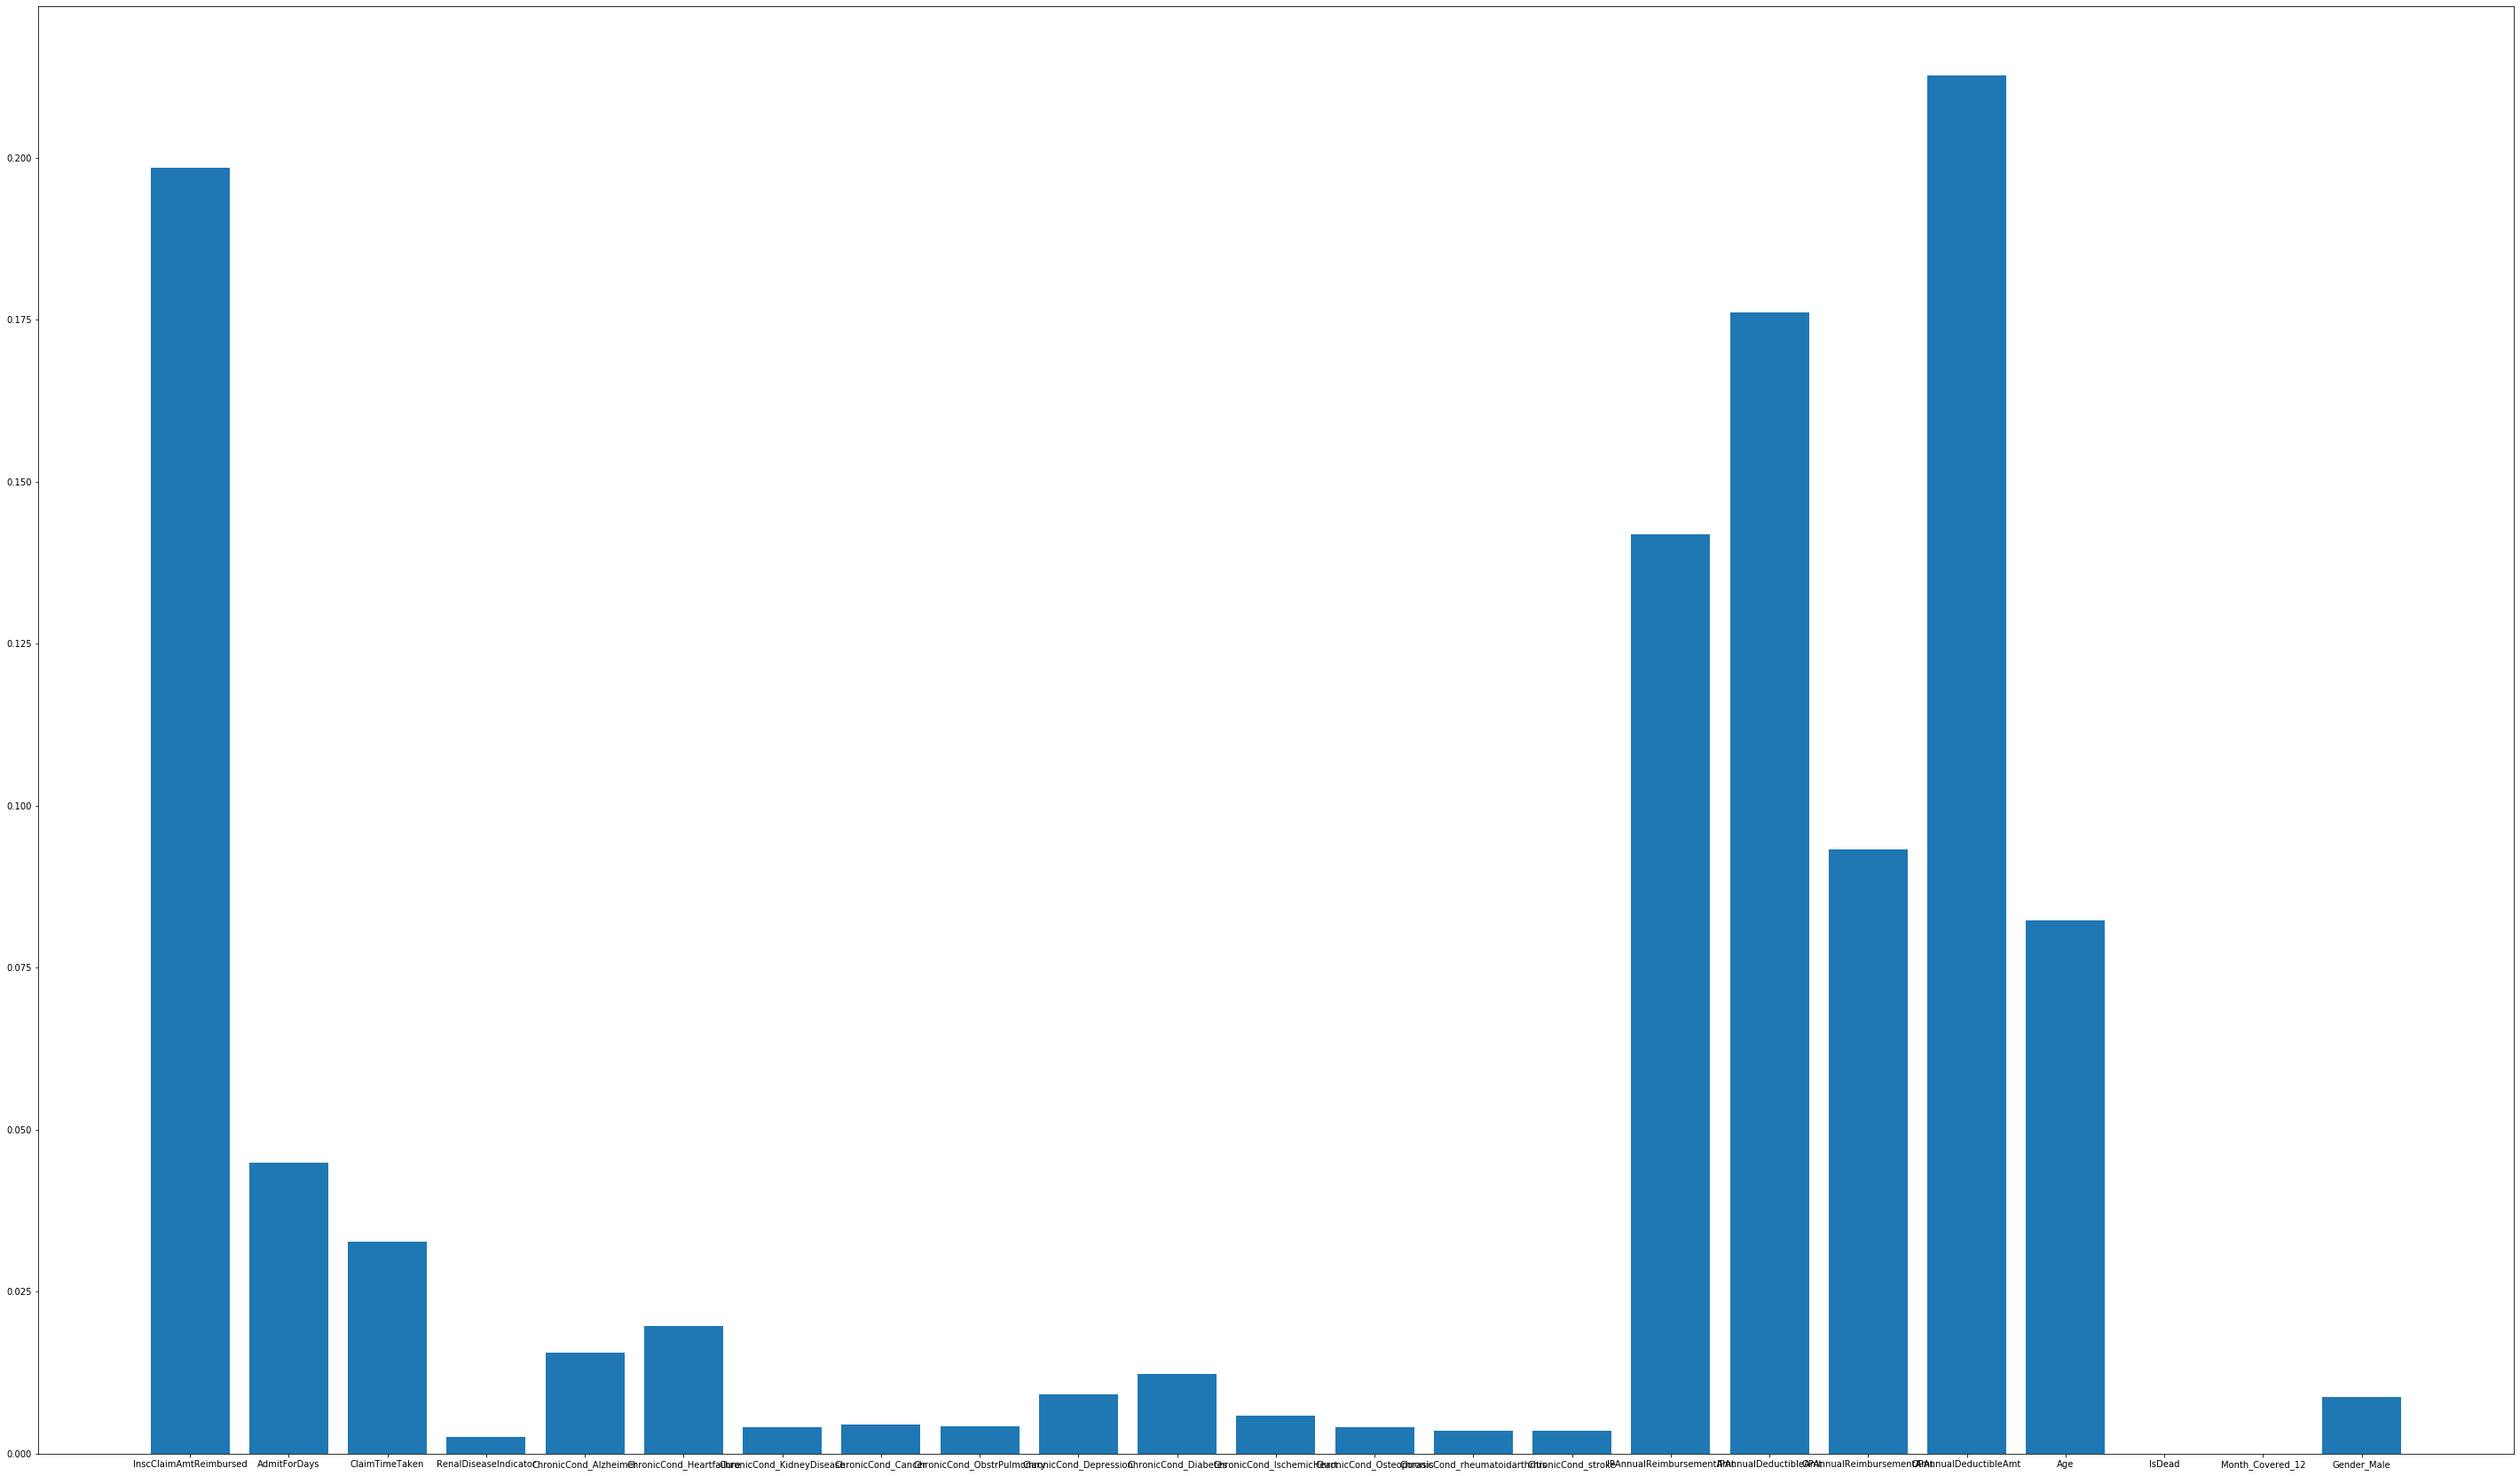

In [158]:
plt.figure(figsize=(50, 30))
plt.bar(X.columns , perm.feature_importances_std_ * 100)
plt.show()

In [159]:
X=train_in_patient[['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age']]
y=train_in_patient[['PotentialFraud']]

print(X.shape,y.shape)

(40474, 6) (40474, 1)


In [160]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 6 columns):
InscClaimAmtReimbursed      40474 non-null int64
IPAnnualReimbursementAmt    40474 non-null int64
IPAnnualDeductibleAmt       40474 non-null int64
OPAnnualReimbursementAmt    40474 non-null int64
OPAnnualDeductibleAmt       40474 non-null int64
Age                         40474 non-null float64
dtypes: float64(1), int64(5)
memory usage: 2.2 MB


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [162]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [163]:
accuracy_score(y_test, y_pred)

0.5810755167586263

In [164]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [165]:
accuracy_score(y_test, y_pred)

0.5636168986247221

In [166]:
confusion_matrix(y_test, y_pred)

array([[1808, 3279],
       [2020, 5036]])